In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [76]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [77]:
n_firms = 10 
n_consumers = 10000
n_chars = 2
T = 100
s = 100

# approximately the model at true parameters and at the estimation value of the parameters 
lognormal_mean_hat = 1.630208

simga_hat = 0.2
# mu_hat =  np.log(lognormal_mean_hat)-(simga_hat**2/2)
mu_hat = 0.5
beta1_hat = 1.990256
beta2_hat = -0.301219
beta3_hat = -0.301233


# for the production function estimation 

print(mu_hat)

0.5


In [78]:
# Instead of this it can also be posibile to just plug in the model estimation from seed 100 directly from 
# the created datasets


model_true = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=4
    )
model_true.demand_side_optimisation()


In [79]:
model_estimated = IntegratedMarketModel(
    n_firms, 
    n_consumers, 
    n_chars, 
    T, 
    beta1=beta1_hat,
    beta2=beta2_hat,
    beta3=beta3_hat,
    mu=mu_hat,
    sigma=simga_hat,
    seed=1

)

In [80]:
marginal_costs_estimated_all = []


for t in range(0, T, 1):
    vp1 = model_estimated.v_p[:,t]
    price_true = model_true.prices[:,t]
    market_shares_true = model_true.market_shares[:,t]
    marginal_cost_true = model_true.costs[:,t]
    e=0 

    market_shares, all_probs, mean_indirect_utility = model_estimated.compute_share(vp1, price_true, e)
    J_estimated = model_estimated.construct_Jacobian(all_probs, vp1)

    inverse_Jacobian = np.linalg.inv(J_estimated)
    marginal_cost_estimation = np.matmul(inverse_Jacobian, market_shares_true) + price_true

    marginal_costs_estimated_all.append(marginal_cost_estimation)


estimated_marginal_costs =  np.concatenate(marginal_costs_estimated_all)

# Get estimated markups 

prices_all_true = model_true.prices.flatten()
estimated_markups = prices_all_true/estimated_marginal_costs





# Get the real markups 
real_markups = model_true.markups.flatten()


print(real_markups)
print(estimated_markups)

[1.20514826 1.20532139 1.20219286 1.2088558  1.20954765 1.20747686
 1.20944733 1.21011814 1.20591395 1.20833517 1.20678946 1.20998139
 1.21458932 1.21435663 1.21442765 1.2191364  1.2182629  1.21092901
 1.21137912 1.2163429  1.21498122 1.21336527 1.2132485  1.21509805
 1.20888489 1.21395481 1.2140796  1.21949233 1.22118143 1.21386723
 1.21471011 1.21269737 1.21034239 1.20494966 1.20811698 1.20713047
 1.2066812  1.20654859 1.2076807  1.20756333 1.21246819 1.21074981
 1.20896949 1.20971607 1.20398546 1.20552284 1.20355647 1.19894202
 1.2015406  1.20068605 1.2027235  1.2019694  1.20681225 1.21264977
 1.21247317 1.21104891 1.20966644 1.20895099 1.21009031 1.21435351
 1.2084532  1.20735685 1.21114209 1.20979003 1.2133921  1.21331245
 1.2134922  1.21054368 1.21227606 1.20649345 1.20254204 1.20865445
 1.21296944 1.20931004 1.20435869 1.20683283 1.20133972 1.20042456
 1.20504523 1.20171001 1.2053378  1.20665805 1.20946202 1.20370424
 1.20292694 1.20579369 1.20985024 1.21047553 1.20772598 1.2146

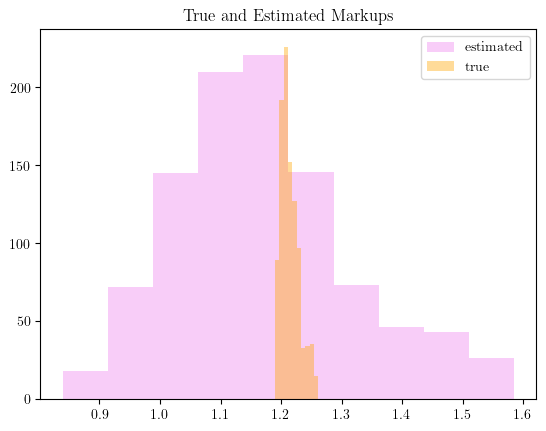

In [81]:
# The approximation of the market equilibirum and the Jacobian needs to be separately determined 
plt.hist(estimated_markups, 
         bins=10,
         alpha=0.4, 
         label='estimated',
         color='violet') # customized color parameter
  
plt.hist(real_markups,
         bins=10, 
         alpha=0.4,
         label='true',
         color='orange')

plt.title('True and Estimated Markups')
plt.legend(loc='upper right')
plt.show()





In [82]:
e = 0 

vp_true = model_true.v_p[:,0]
vp_other_draw = model_estimated.v_p[:,0]

true_prices_period_0 = model_true.prices[:,0]
true_probabilities = model_true.compute_share

J_true = model_true.construct_Jacobian(all_probs, vp_true)
J_approx = model_true.construct_Jacobian(all_probs, vp_other_draw)


J_true_flat = J_true.flatten()
J_approx_flat = J_approx.flatten()


# Compare the matrices element-wise with a tolerance of 0.2
comparison = np.allclose(J_true, J_approx, atol=1e-03)

# Print the result
if comparison:
    print("The matrices are approximately the same.")
else:
    print("The matrices are different.")


[[-3.56924830e-03  3.20474597e-05  1.19954598e-05  1.19080343e-05
   1.25172237e-05  3.50501514e-05  1.39613287e-05  1.08781275e-05
   1.56493638e-05  1.50669460e-05]
 [ 3.20474597e-05 -5.28593351e-03  1.66451325e-05  1.65303757e-05
   1.73636622e-05  4.85586722e-05  1.94312312e-05  1.52141734e-05
   2.17742279e-05  2.08730481e-05]
 [ 1.19954598e-05  1.66451325e-05 -1.88943318e-03  6.18028231e-06
   6.49529710e-06  1.81820138e-05  7.25065670e-06  5.65632243e-06
   8.12672283e-06  7.81579674e-06]
 [ 1.19080343e-05  1.65303757e-05  6.18028231e-06 -1.88696620e-03
   6.44841840e-06  1.80487624e-05  7.20041787e-06  5.61953377e-06
   8.07020632e-06  7.75849127e-06]
 [ 1.25172237e-05  1.73636622e-05  6.49529710e-06  6.44841840e-06
  -1.96197568e-03  1.89734893e-05  7.56385912e-06  5.89864800e-06
   8.47794159e-06  8.15604500e-06]
 [ 3.50501514e-05  4.85586722e-05  1.81820138e-05  1.80487624e-05
   1.89734893e-05 -5.35464120e-03  2.11552274e-05  1.64750534e-05
   2.37137782e-05  2.28414343e-05

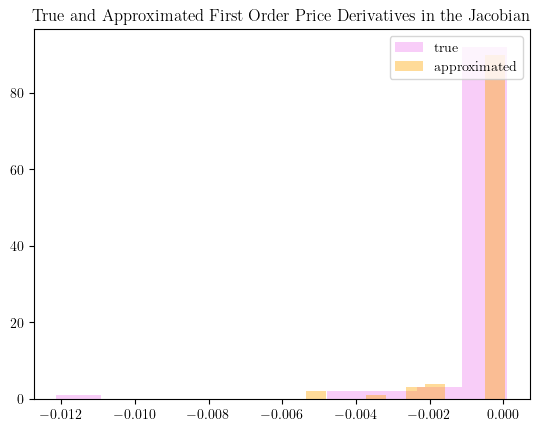

In [83]:
plt.hist(J_true_flat, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(J_approx_flat,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()

In [84]:
wage = 15 
theta_0 = 1
theta_L = 0.3 
theta_K = 0.7
q= np.ones(2)

productivity_shocks = np.ones((2,2))
capital = np.ones((2,2))

t = 0

MC = (wage*(1/theta_L))*((q)/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))**((1/theta_L)-1) *(1/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))

print(MC)

[0.06363169 0.06363169]


In [85]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.shape)

(2, 3)


In [88]:
a1, a2, a0, s0 = model_true.get_alphas()
print(a0)
print(s0)


a2_final = a2.flatten()
print(a2_final)

-1.6820276496988864
0.33979778797685584
[-1.66547829 -1.82210107 -1.35096373 ... -1.74343963 -1.49313057
 -1.52775405]


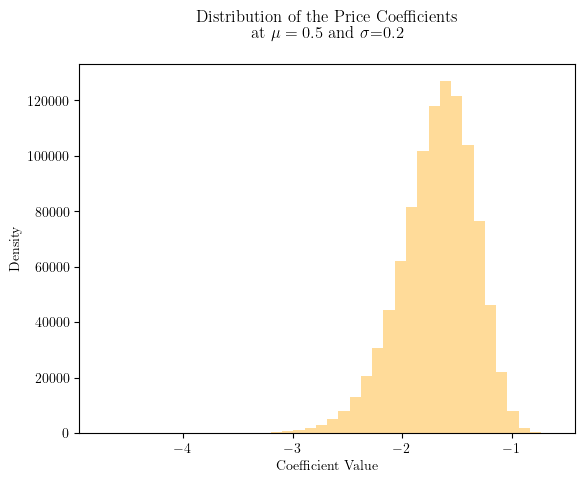

In [87]:
  
plt.hist(a2_final,
         bins=40, 
         alpha=0.4,
        #  label='Price Coeffi',
         color='orange')

plt.title('Distribution of the Price Coefficients \n at $\mu = 0.5$ and $\sigma$=0.2 \n')
plt.xlabel('Coefficient Value')
plt.ylabel('Density')
# plt.legend(loc='upper right')
plt.savefig('../plots/distr_price_coeff.pdf')
plt.show()